### Overview Dataset

"Data Komponen Beton".

Data set ini berisikan beberapa kategori sebagai berikut
* cement (kg)
* slag (blast furnace slag, kg)
* ash (fly ash, kg)
* water (kg)
* superplastic (superplasticizer, kg)
* coarseagg (coarse aggregate, kg)
* fineagg (fine aggregate, kg)
* age (days, 1-365)
* strength (Concrete compressive strength, MPa)

# Exploratory Data Analysis (EDA)


# Instruksi Tugas Praktikum FIKTI dan FTI

1. Buat univariate dan bivariate analysis untuk data set di atas
2. Jelaskan kesimpulan yang bisa di ambil dari analysis yg anda lakukan


<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv")
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1 [Strength]

### **i.	Distribusi**

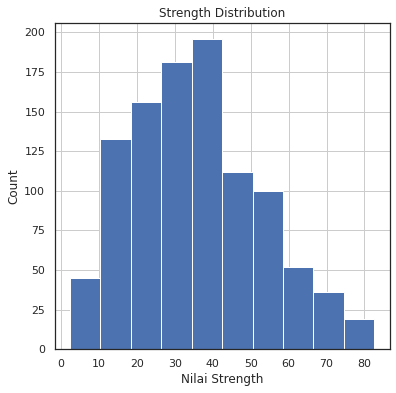

In [36]:
# Buat diagram di sini
data['strength'].hist(figsize=(6,6))
plt.xlabel("Nilai Strength")
plt.ylabel("Count")
plt.title("Strength Distribution")
plt.show()

### **ii.	Deskripsi**

Jelaskan diagram di atas

Diagram di atas menjelaskan bahwa :
*  atribut "strength" simetris.
*  nilai strength dengan kisaran 0-80 rata-rata berada di angka 40 dengan hampir 200 banyak data

**Karena rata-rata nilai strength berada di angka 40, maka kita akan membuat strength menjadi dua kategori yaitu dengan tingkat strength <40Mpa dan tingkat strength >=40Mpa**

In [37]:
x = []
for i in data['strength']:
  if i <= 40:
    x.append("<=40Mpa")
  else:
    x.append(">40Mpa")
data['strength_Mpa'] = x
display(data)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_Mpa
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,<=40Mpa
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,<=40Mpa
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,<=40Mpa
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,>40Mpa
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,<=40Mpa
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,<=40Mpa
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,>40Mpa
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,>40Mpa
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,>40Mpa


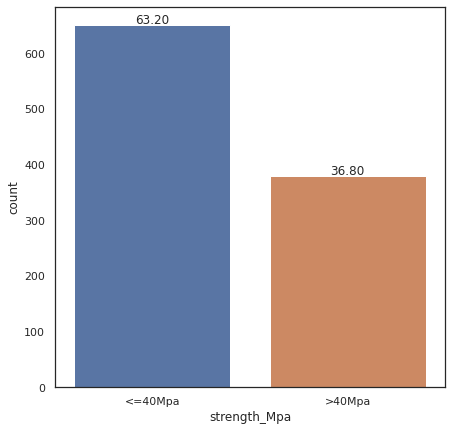

In [38]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="strength_Mpa", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

### **ii. Deskripsi**
Distribusi di atas menjelaskan bahwa :
* **Dataset pada strength sebanyak 63.20% dengan <=40Mpa dan 36.80% dengan >40Mpa**

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 [age-strength_Mpa] Hubungan

### i. **Boxplot**

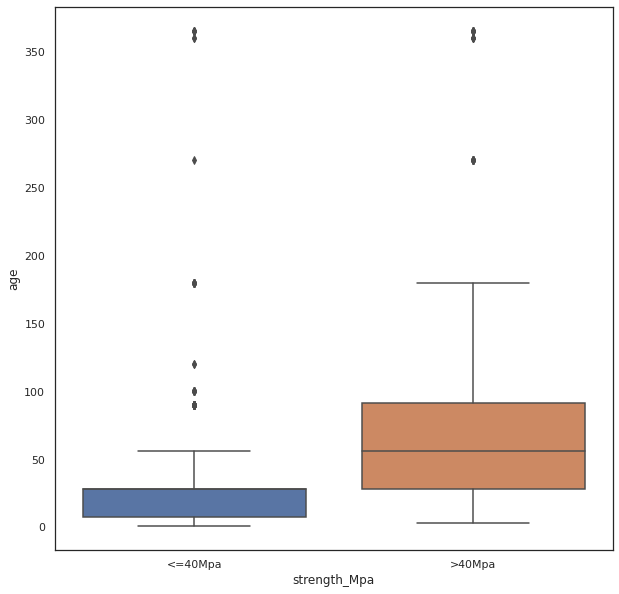

In [39]:
# Buat diagram di sini
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="strength_Mpa", y="age", data=data)
plt.show()

In [40]:
data[['strength_Mpa', 'age']].groupby(['strength_Mpa'], as_index=False).mean().sort_values(by='age', ascending=False)

,strength_Mpa,age
1,>40Mpa,72.044855
0,<=40Mpa,30.302611


### ii. Deskripsi

Jelaskan diagram di atas

* Komponen beton yang lebih kuat (>40Mpa) memiliki umur yang lebih panjang dibandingkan komponen beton yang lebih lemah (<=40Mpa) memiliki umur yang cenderung lebih pendek.
* Rata-rata umur beton yang lebih kuat (>40Mpa) adalah 72.04, sedangkan rata-rata umur beton yang lebih lemah (<=40Mpa) adalah 30.30
* Terdapat korelasi atau hubungan antara umur dengan kekuatan beton

### iii. Uji Hipotesis
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis :- tidak ada perbedaan Rerata usia kelompok kekuatan beton <=40Mpa dan kelompok kekuatan beton >40Mpa.
*  Alternate Hypothesis :- ada perbedaan Rerata usia kelompok kekuatan beton <=40Mpa dan kelompok kekuatan beton >40Mpa.

In [44]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

strength_Mpa_1 = data[data['strength_Mpa']=='<=40Mpa']['age']
strength_Mpa_0 = data[data['strength_Mpa']=='>40Mpa']['age']

strength_Mpa_0 = strength_Mpa_0.values.tolist()
strength_Mpa_0 = random.sample(strength_Mpa_0, 100)
strength_Mpa_1 = strength_Mpa_1.values.tolist()
strength_Mpa_1 = random.sample(strength_Mpa_1, 100)

In [47]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(strength_Mpa_1,strength_Mpa_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -7.911991238883243
p value 2.369033874420464e-13
null hypothesis ditolak


### iv. Kesimpulan akhir

Tulis kesimpulan akhir mengenai dataset
* Dapat disimpulkan bahwa terdapat perbedaan yang signifikan pada rerata usia kekuatan beton (<=40Mpa) dan kekuatan beton (>40Mpa).
* Hal Ini membuktikan bahwa usia memiliki peranan dalam membedakan kekuatan beton